In [8]:
import pandas_datareader as web
import numpy as np
# 读取融捷股份的数据
RJ = web.DataReader('300450.SZ',data_source='yahoo',start='3/01/2015')

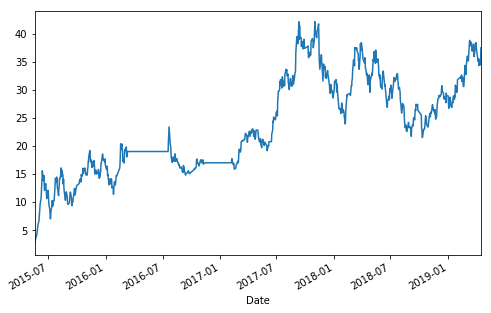

In [3]:
# 收盘价曲线
RJ['Close'].plot(figsize=(8,5))

In [11]:
%%time
RJ['RET_Loop']=0.0
# 循环法求单个对数收益率
for i in range(1,len(RJ)):
    RJ['RET_Loop'][i] = np.log(RJ['Close'][i]/RJ['Close'][i-1])

Wall time: 196 ms


In [14]:
RJ[['Close','RET_Loop']].tail()

,Close,RET_Loop
Date,,
2019-04-11,34.299999,-0.016768
2019-04-12,35.400002,0.031567
2019-04-15,34.400002,-0.028655
2019-04-16,34.990002,0.017006
2019-04-17,37.450001,0.067944


In [17]:
# 向量化
%time RJ['Return'] = np.log(RJ['Close']/RJ['Close'].shift(1))

Wall time: 968 µs


In [18]:
RJ[['Close','RET_Loop','Return']].tail()

,Close,RET_Loop,Return
Date,,,
2019-04-11,34.299999,-0.016768,-0.016768
2019-04-12,35.400002,0.031567,0.031567
2019-04-15,34.400002,-0.028655,-0.028655
2019-04-16,34.990002,0.017006,0.017006
2019-04-17,37.450001,0.067944,0.067944


In [19]:
del RJ['RET_Loop']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C8B087D2B0>,
      dtype=object)

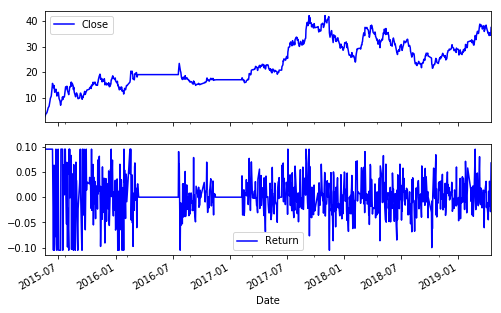

In [21]:
RJ[['Close','Return']].plot(subplots=True,style='b',figsize=(8,5))

In [24]:
import pandas as pd
RJ['42d'] = RJ['Close'].rolling(42).mean()
RJ['252d'] =RJ['Close'].rolling(252).mean()
RJ[['Close','42d','252d']].tail()

,Close,42d,252d
Date,,,
2019-04-11,34.299999,35.301904,29.822792
2019-04-12,35.400002,35.383095,29.816292
2019-04-15,34.400002,35.440000,29.800537
2019-04-16,34.990002,35.496190,29.792131
2019-04-17,37.450001,35.637857,29.796469


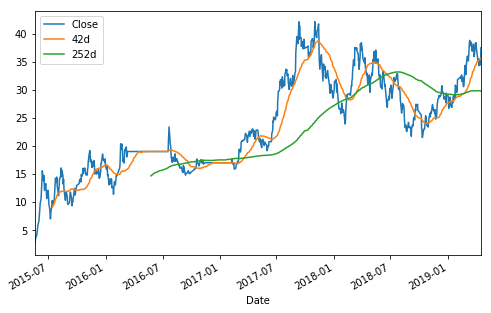

In [25]:
RJ[['Close','42d','252d']].plot(figsize=(8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C8B0CA0E10>,
      dtype=object)

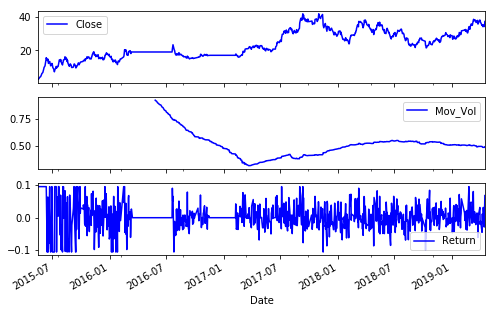

In [28]:
import math
RJ['Mov_Vol'] = RJ['Return'].rolling(252).std()*math.sqrt(252)
RJ[['Close','Mov_Vol','Return']].plot(subplots=True,style='b',figsize=(8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C8B0C9F160>,
      dtype=object)

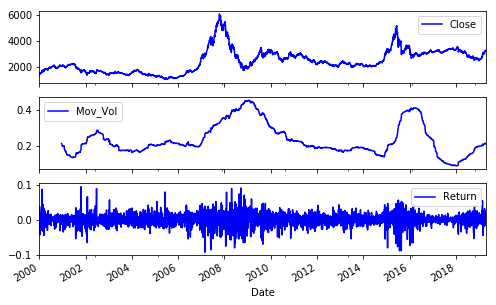

In [29]:
SH = web.DataReader('000001.SS',data_source='yahoo',start='01/01/2000')
SH['Return'] = np.log(SH['Close']/SH['Close'].shift(1))
SH['Mov_Vol'] = SH['Return'].rolling(252).std()*math.sqrt(252)
SH[['Close','Mov_Vol','Return']].plot(subplots=True,style='b',figsize=(8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C8B1026D68>,
      dtype=object)

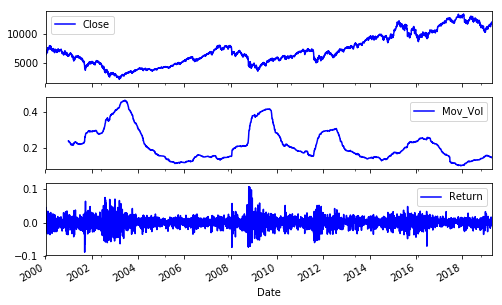

In [31]:
DAX = web.DataReader('^GDAXI',data_source='yahoo',start='01/01/2000')
DAX['Return'] = np.log(DAX['Close']/DAX['Close'].shift(1))
DAX['Mov_Vol'] = DAX['Return'].rolling(252).std()*math.sqrt(252)
DAX[['Close','Mov_Vol','Return']].plot(subplots=True,style='b',figsize=(8,5))